# Weather

***

This notebook contains a summary of Tasks 1-7, as well as a brief analysis of weather data downloaded from [https://data.gov.ie/](https://data.gov.ie/).

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Task Summaries

***

#### TASK 1: Create Directory Structure

Directories can be created from the command line using the `mkdir` command. The [MAN page for mkdir](https://linux.die.net/man/1/mkdir) explains its usage. [Bash](https://www.gnu.org/software/bash/) is a 'shell' (a.k.a. a command line interpreter) that executes the commands. The [Bash manual](https://www.gnu.org/software/bash/manual/bash.html) covers Bash features in detail.
    
To create the data directory the following command can be used:

`$ mkdir data`

Once that directory is created, we can navigate into that new directory with the following command:

`$ cd data`

Note `cd` is used to [change directory.](https://www.gnu.org/software/bash/manual/bash.html#index-cd)

Once inside the data directory we can then create two more directories using the following commands:

`& mkdir weather`

`$ mkdir timestamps`


To save time, we can combine those commands into one succint command, as `mkdir` accepts multiple arguements:
    
`$ mkdir -p data/weather data/timestamps`

- https://unix.stackexchange.com/questions/338104/creating-multiple-nested-directories-with-one-command
    
Note the use of the `-p` flag (short for `--parents`) which tells Bash to create parent directories as required.

#### TASK 2: Timestamps

We can invoke the `date` command-line tool to timestamp files.

- https://www.gnu.org/software/coreutils/manual/html_node/date-invocation.html#date-invocation

From the root of the directory, navigate into the timestamps directory using the following command:

`$ cd data/timestamps`

The `date` command displays system time and date. The output from `date` command can be appended to a file. In computing terms to append means to "write more data to the end of a pre-existing file" (The American Heritage® Dictionary of the English Language, 5th Edition)

If the file does not exist, it is created automatically.

`$ date >> now.txt`

The '>>' operator pipes the output from `date` into a file called 'now.txt'

- https://www.gnu.org/software/bash/manual/bash.html#Appending-Redirected-Output

There are many optional arguements that can be used when invoking `date`:

- https://www.man7.org/linux/man-pages/man1/date.1.html

#### TASK 3: Formatting Timestamps

The output from `date` can be formatted by providing different option to the `date` command.

`$ date --help` shows where to get full documentation as well as a full list of FORMAT controls, a sample of which is shown below:

```
  %a   locale's abbreviated weekday name (e.g., Sun)
  %A   locale's full weekday name (e.g., Sunday)
  %b   locale's abbreviated month name (e.g., Jan)
  %B   locale's full month name (e.g., January)
  %c   locale's date and time (e.g., Thu Mar  3 23:05:25 2005)
  %C   century; like %Y, except omit last two digits (e.g., 20)
```

This site gives a good overview of how to combine optional arguements:

- https://www.howtogeek.com/410442/how-to-display-the-date-and-time-in-the-linux-terminal-and-use-it-in-bash-scripts/

The format string always begins with the plus sign `+`, followed by the option. Each option has a leading `%` sign:  
    
`$ date +%Y%m%d_%H%M%S`

The output is as follows: `20241103_153645`


The above command is comprised of the following optional arguments. An underscore seperates the string for better readability:

```
%Y   year
%m   month (01..12)
%d   day of month (e.g., 01)
%H   hour (00..23)
%M   minute (00..59)
%S   second (00..60)
```

#### TASK 4: Create Timestamped Files

Append to file:

```    
$ touch `date +%Y%m%d_%H%M%S.txt`
```

touch man page:

- https://www.man7.org/linux/man-pages/man1/touch.1.html

#### TASK 5: Download Today's Weather Data

wget 

- https://www.gnu.org/software/wget/

Used command:

```
$ wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```

`man` page wget:

- https://man7.org/linux/man-pages/man1/wget.1.html

#### TASK 6: Timestamp the Data

Used command:

```
$ wget -O `date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today
```

#### TASK 7: Write the Script

FreeCodeCamp gives a good crash course on how to create a bash script:

- https://www.freecodecamp.org/news/shell-scripting-crash-course-how-to-write-bash-scripts-in-linux/


`$ touch weather.sh`

Put the command in the new file:

`$ wget -O 'date +%Y%m%d_%H%M%S.json' https://prodapi.metweb.ie/observations/athenry/today `

Make the script executable:

`$ chmod +x weather.sh`

Executed using:
    
`$ ./weather.sh`

### Data Analysis

***

The weather files downloaded contain daily weather data such as temperature, rainfall, windspeed, humidity, and time. The file is in json format a format that's easy for humans to read/write and easy for machines to parse.

Pandas has a built-in method for reading json files.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [2]:
# Read in the json file
df = pd.read_json("data/weather/20241001_195243.json")

In [3]:
# View head of dataframe
df.head(5)


,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,8,02n,Fair,"""Fair""",7,-,NW,315,96,0,1015,Tuesday,2024-01-10,00:00
1,Athenry,7,02n,Fair,"""Fair""",7,-,NW,315,97,0,1016,Tuesday,2024-01-10,01:00
2,Athenry,7,02n,Fair,"""Fair""",9,-,NW,315,97,0,1016,Tuesday,2024-01-10,02:00
3,Athenry,8,02n,Fair,"""Fair""",9,-,NW,315,97,0,1016,Tuesday,2024-01-10,03:00
4,Athenry,9,04n,Cloudy,"""Cloudy""",9,-,NW,315,97,0,1016,Tuesday,2024-01-10,04:00


In [4]:
# View the column headers 
df.columns.tolist()

['name',
 'temperature',
 'symbol',
 'weatherDescription',
 'text',
 'windSpeed',
 'windGust',
 'cardinalWindDirection',
 'windDirection',
 'humidity',
 'rainfall',
 'pressure',
 'dayName',
 'date',
 'reportTime']

Now to do some plotting using [Matplotlib.](https://matplotlib.org/) Matplotlib is a popular data visualisation library which can be used to create a variety of different plots.

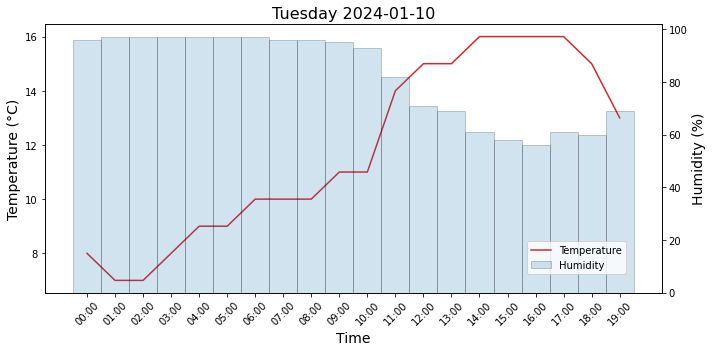

In [5]:
# Get day, date info for plot title
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
date = df['date'].iloc[0]
day = df['dayName'].iloc[0]

# Set up the canvas
fig, ax = plt.subplots(figsize=(10, 5))

# Create line plot for temperature
ax.plot(
    df['reportTime'],
    df['temperature'],
    linestyle='-',
    color='tab:red',
    label='Temperature',
    zorder=3
    )

# Set up a secondary y-axis for the rainfall bar chart
ax2 = ax.twinx()

# Create bar plot for humidity
ax2.bar(
    df['reportTime'],
    df['humidity'],
    width=1,
    color='tab:blue',
    edgecolor='black',
    linewidth=1,
    alpha=0.2,
    label='Humidity',
    zorder=2
    )

# Decorate the plot
ax.set_title(f"{day} {date}", fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)
ax2.set_ylabel('Humidity (%)', fontsize=14)

# Rotate x-tick labels for readability
ax.tick_params(axis='x', rotation=45)

# Add legend
fig.legend(loc="lower right",bbox_to_anchor=(0.95, 0.05), bbox_transform=ax.transAxes)

# Auto adjust layout
plt.tight_layout()

Pandas `describe()` method provides a summary of key statistics, including min, max, mean, standard deviation, for numerical data in a DataFrame/Series:

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [6]:
# Statistical summary of columns of interest
df[['temperature', 'windSpeed', 'humidity', 'pressure']].describe()

,temperature,windSpeed,humidity,pressure
count,20.000000,20.000000,20.000000,20.000000
mean,11.800000,10.200000,82.250000,1016.800000
std,3.318211,2.284962,16.707625,0.894427
min,7.000000,7.000000,56.000000,1015.000000
25%,9.000000,9.000000,67.000000,1016.000000
50%,11.000000,9.000000,94.000000,1017.000000
75%,15.000000,11.500000,97.000000,1017.250000
max,16.000000,15.000000,97.000000,1018.000000


[Correlation](https://en.wikipedia.org/wiki/Correlation) describes the relationship between two variables.

Pandas can be used to compute "pairwise correlation of columns".

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [7]:
# Calculate the correlation matrix of specified columns
correlation_matrix = df[['temperature', 'windSpeed', 'humidity', 'pressure']].corr()

The resulting matrix can be plotted using Seaborns `heatmap()` method:

- https://seaborn.pydata.org/generated/seaborn.heatmap.html

Text(0.5, 1.0, 'Correlation Matrix of Weather Variables')

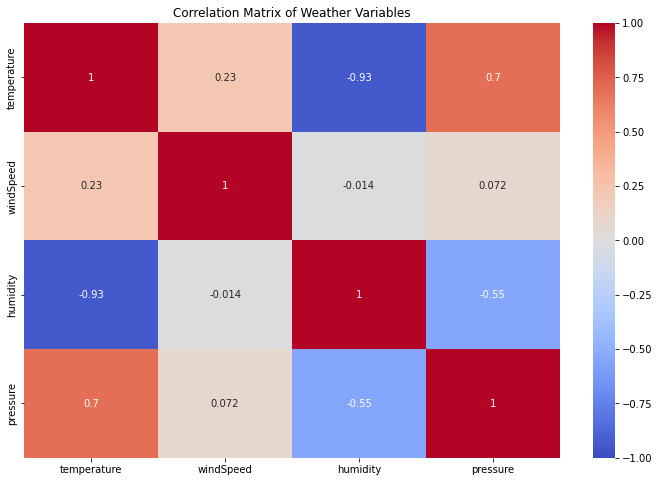

In [8]:
# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix of Weather Variables')

There is a positive correlation between Pressure and Temperature i.e. if pressure rises, temperature tends to increase.

**Note:** correlation doesn't imply causation.

A simple linear regression line represents an "approximation of the relationship between X and Y"

- https://www.geeksforgeeks.org/what-is-regression-line/

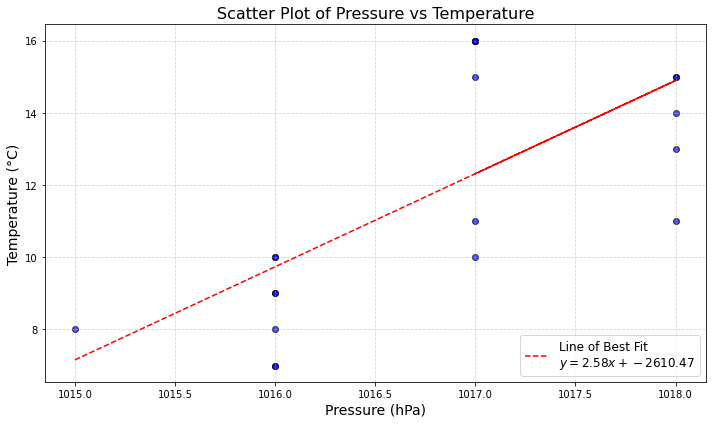

In [9]:
# Plot scatter
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df['pressure'], df['temperature'], color='b', alpha=0.7, edgecolors='k')

# Fit a Linear Regression Line
m, b = np.polyfit(df['pressure'], df['temperature'], 1)  # m = slope, b = intercept
ax.plot(df['pressure'], m * df['pressure'] + b, color='red', linestyle='--', label=f'Line of Best Fit\n$y={m:.2f}x + {b:.2f}$')

# Add Titles and Labels
ax.set_title('Scatter Plot of Pressure vs Temperature', fontsize=16)
ax.set_xlabel('Pressure (hPa)', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend
ax.legend(fontsize=12, loc='lower right')

# Auto adjust layout
plt.tight_layout()

***

### END